3. PREPARE

In [1]:
# Import libraries
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math

# Import utils

# Checking dataset
for pathname, dirnames, filenames in os.walk('/kaggle/input/human-resource-data-set-the-company'):
    for filename in filenames:
        if filename.endswith('.txt'):
            print("Found text file:", os.path.join(pathname, filename)  )


Found text file: /kaggle/input/human-resource-data-set-the-company/2021.06_job_profile_mapping.txt
Found text file: /kaggle/input/human-resource-data-set-the-company/EngagementSurvey.txt
Found text file: /kaggle/input/human-resource-data-set-the-company/2021.06_COL_2021.txt
Found text file: /kaggle/input/human-resource-data-set-the-company/CompanyData.txt
Found text file: /kaggle/input/human-resource-data-set-the-company/Diversity.txt


In [2]:
# Currency Transformation
Currency_Rate = {
"JPY": 0.0068,
"HKD": 0.1284,
"USD": 1,
"GBP": 1.3550,
"NOK": 0.1012
}

In [3]:
dir = '/kaggle/input/human-resource-data-set-the-company/'
COL = pl.read_csv(dir + '2021.06_COL_2021.txt',separator="\t")
Diversity = pl.read_csv(dir + 'Diversity.txt',separator="\t")
Engagement = pl.read_csv(dir + 'EngagementSurvey.txt',separator="\t")
Profile = pl.read_csv(dir + '2021.06_job_profile_mapping.txt',separator="\t")
Profile.columns = [col.strip() for col in Profile.columns]
# Define the correct data type for the ZipCode column
overrides = {
    "ZipCode": pl.Utf8
}

Company = pl.read_csv(dir + 'CompanyData.txt', separator="\t", encoding="utf-16-le",schema_overrides=overrides)

print('dir: \n')
display(dir)
print('COL (Cost of Living Table): \n')
display(COL)
print('Diversity: \n')
display(Diversity)
print('Engagement: \n')
display(Engagement)
display(Engagement.schema)
print('Profile: \n')
display(Profile)
display(Profile.schema)
print('Company: \n')
display(Company)

display(Company.schema)

dir: 



'/kaggle/input/human-resource-data-set-the-company/'

COL (Cost of Living Table): 



Office,COL Amount,Currency
str,i64,str
"""NYC""",100,"""USD"""
"""Boulder""",70,"""USD"""
"""Oslo""",70,"""NOK"""
"""SanJose""",90,"""USD"""
"""London""",90,"""GBP"""
"""Tokyo""",85,"""JPY"""
"""HongKong""",85,"""HKD"""
"""SanFran""",100,"""USD"""
"""Austin""",70,"""USD"""


Diversity: 



EmployeeID,Gender,Gender Identity,Race/Ethnicity,Veteran,Disability,Education,Sexual Orientation
i64,str,str,str,i64,i64,str,str
100001,"""female""","""female""","""White""",0,0,"""Undergraduate""","""Heterosexual"""
100002,"""male""","""male""","""White""",0,1,"""Undergraduate""","""Heterosexual"""
100003,"""female""","""female""","""Asian""",0,0,"""Undergraduate""","""Heterosexual"""
100004,"""male""","""male""","""White""",0,0,"""Undergraduate""","""Heterosexual"""
100005,"""male""","""male""","""Hispanic or Latino""",0,0,"""Undergraduate""","""Missing"""
…,…,…,…,…,…,…,…
104964,"""male""","""male""","""Asian""",0,0,"""Undergraduate""","""Heterosexual"""
104965,"""female""","""female""","""Hispanic or Latino""",0,0,"""Undergraduate""","""Heterosexual"""
104966,"""male""","""male""","""White""",0,0,"""Undergraduate""","""Missing"""


Engagement: 



EmployeeID,Survey,I would recommend my friends or Family to work at TheCompany,I feel engaged in my work.,I believe Leadership cares about the employees at TheCompany,My manager supports me in my role at TheCompany,"TheCompany cares about Diversity, Equity and Inclusion.",I believe there is room for me to grow at TheCompany,I work on interesting projects.,My manager motivates me to work hard.,I am motivated to work hard at TheCompany.,I believe I am recognized for the work I do.,I believe there are good career opportunities for me at TheCompany.,I believe TheCompany is in a great position in the market for the next few years to be succesful.,I plan on staying with TheCompany for at least 2 more years.,I believe I am fairly compensated for my work.,I believe there is little to not politics at TheCompany,I feel comfortable going to someone in leadership if there is an issue.,My values align with the culture at TheCompany,I know what TheCompany values are at TheCompany,I feel like I can take off my accrued Paid Time Off (PTO)/Vacation without feeling guilty,What does TheCompany do well?,What can TheCompany improve?
i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
100001,"""2023Q2""",3,3,2,1,1,3,2,4,4,2,2,3,4,2,2,4,4,3,3,null,null
100002,"""2023Q2""",3,4,2,4,2,4,4,2,2,4,4,3,1,5,1,2,4,3,1,null,null
100009,"""2023Q2""",3,4,2,3,4,3,2,2,3,4,2,1,1,3,2,2,3,2,4,null,null
100014,"""2023Q2""",4,1,5,2,5,3,4,4,2,3,3,3,4,2,2,4,3,3,2,null,null
100018,"""2023Q2""",4,1,1,1,2,3,1,3,2,3,4,4,3,2,4,3,2,2,3,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
104964,"""2023Q2""",3,3,3,4,2,1,4,4,2,1,2,4,4,1,4,2,3,2,3,null,null
104965,"""2023Q2""",4,4,4,2,4,3,3,3,4,1,4,1,1,4,2,1,1,4,4,null,null
104966,"""2023Q2""",3,3,3,3,2,2,3,2,3,4,3,3,3,3,4,4,4,3,3,null,null


Schema([('EmployeeID', Int64),
        ('Survey', String),
        ('I would recommend my friends or Family to work at TheCompany',
         Int64),
        ('I feel engaged in my work.', Int64),
        ('I believe Leadership cares about the employees at TheCompany',
         Int64),
        ('My manager supports me in my role at TheCompany', Int64),
        ('TheCompany cares about Diversity, Equity and Inclusion.', Int64),
        ('I believe there is room for me to grow at TheCompany', Int64),
        ('I work on interesting projects.', Int64),
        ('My manager motivates me to work hard.', Int64),
        ('I am motivated to work hard at TheCompany.', Int64),
        ('I believe I am recognized for the work I do.', Int64),
        ('I believe there are good career opportunities for me at TheCompany.',
         Int64),
        ('I believe TheCompany is in a great position in the market for the next few years to be succesful.',
         Int64),
        ('I plan on staying with Th

Profile: 



Department,Job_title,Job_Profile,Compensation,Level,Bonus %
str,str,str,str,str,f64
"""Corporate""","""CEO""","""JP_1000""",""" 500,000.00 ""","""CSuite""",1.0
"""Corporate""","""HR Manager""","""JP_1001""",""" 100,000.00 ""","""Manager""",0.2
"""Corporate""","""AR Specialist""","""JP_1002""",""" 65,000.00 ""","""Individual Contributor""",0.15
"""Corporate""","""AP Specialist""","""JP_1003""",""" 65,000.00 ""","""Individual Contributor""",0.15
"""Corporate""","""FP&A Analyst""","""JP_1004""",""" 70,000.00 ""","""Individual Contributor""",0.15
…,…,…,…,…,…
"""Corporate""","""Chief Human Resources Officer""","""JP_1049""",""" 380,000.00 ""","""CSuite""",0.5
"""Corporate""","""Senior, Finance""","""JP_1050""",""" 110,000.00 ""","""Senior""",0.15
"""Corporate""","""Director, HR""","""JP_1051""",""" 180,000.00 ""","""Director""",0.2


Schema([('Department', String),
        ('Job_title', String),
        ('Job_Profile', String),
        ('Compensation', String),
        ('Level', String),
        ('Bonus %', Float64)])

Company: 



EmployeeID,First_Name,Surname,StreetAddress,City,State,StateFull,ZipCode,Country,CountryFull,Age,Office,Start_Date,Termination_Date,Office_Type,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,Notes
i64,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,f64,str,str,str,i64,i64,str,str
100001,"""Patrice""","""Moore""","""1427 Buckhannan Avenue""","""North Syracuse""","""NY""","""New York""","""13212""","""US""","""United States""",35,"""NYC""","""5/4/2009""","""12/12/2999""","""Corporate""","""Corporate""","""USD""",1.0,"""CEO""","""1/5/1986""","""CSuite""",500000,1,"""JP_1000""","""Changes for 2021.06: """
100002,"""David""","""Rickards""","""4265 Graystone Lakes""","""Macon""","""GA""","""Georgia""","""31206""","""US""","""United States""",49,"""NYC""","""5/4/2009""","""12/12/2999""","""Corporate""","""Corporate""","""USD""",0.2,"""HR Manager""","""7/13/1971""","""Manager""",70000,1,"""JP_1001""","""Changes for 2021.06: """
100003,"""Grace""","""Maldonado""","""1680 Hudson Street""","""Weehawken""","""NJ""","""New Jersey""","""07087""","""US""","""United States""",32,"""NYC""","""5/18/2009""","""6/5/2013""","""Corporate""","""Marketing""","""USD""",0.15,"""Graphic Designer""","""1/25/1989""","""Individual Contributor""",77000,0,"""JP_1022""","""Changes for 2021.06: """
100004,"""Justin""","""Edgin""","""1262 Limer Street""","""Rome""","""GA""","""Georgia""","""30165""","""US""","""United States""",25,"""Boulder""","""6/22/2009""","""10/16/2013""","""Corporate""","""Technology""","""USD""",0.5,"""CTO""","""5/1/1996""","""CSuite""",400000,0,"""JP_1036""","""Changes for 2021.06: """
100005,"""Benjamin""","""Vargas""","""2431 Rainbow Road""","""Santa Ana""","""CA""","""California""","""92705""","""US""","""United States""",49,"""NYC""","""7/13/2009""","""1/10/2011""","""Corporate""","""Customer Service""","""USD""",0.15,"""Associate Account Manager""","""5/5/1972""","""Manager""",51000,0,"""JP_1015""","""Changes for 2021.06: """
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
104964,"""John""","""Simpson""","""1381 Neville Street""","""Evansville""","""Indiana""","""Indiana""","""47711""","""US""","""United States""",70,"""NYC""","""3/8/2021""","""11/27/2022""","""Corporate""","""Marketing""","""USD""",0.5,"""Chief Marketing Officer""","""11/27/1950""","""CSuite""",370000,1,"""JP_1045""","""Changes for 2021.06: Added on …"
104965,"""Teresa""","""Nation""","""3336 Fleming Way""","""Richmond""","""Virginia""","""Virginia""","""23233""","""US""","""United States""",46,"""Boulder""","""1/25/2021""","""12/12/2999""","""Technology""","""Technology""","""USD""",0.15,"""Software Engineer""","""7/5/1975""","""Individual Contributor""",77000,1,"""JP_1038""","""Changes for 2021.06: Added on …"
104966,"""Lashandra""","""Hall""","""226 White River Way""","""Salt Lake City""","""Utah""","""Utah""","""84111""","""US""","""United States""",39,"""SanJose""","""8/23/2021""","""12/12/2999""","""Corporate""","""Sales""","""USD""",0.15,"""Sales Team Lead""","""4/3/1982""","""Senior""",85500,1,"""JP_1034""","""Changes for 2021.06: Added on …"


Schema([('EmployeeID', Int64),
        ('First_Name', String),
        ('Surname', String),
        ('StreetAddress', String),
        ('City', String),
        ('State', String),
        ('StateFull', String),
        ('ZipCode', String),
        ('Country', String),
        ('CountryFull', String),
        ('Age', Int64),
        ('Office', String),
        ('Start_Date', String),
        ('Termination_Date', String),
        ('Office_Type', String),
        ('Department', String),
        ('Currency', String),
        ('Bonus_pct', Float64),
        ('Job_title', String),
        ('DOB', String),
        ('level', String),
        ('Salary', Int64),
        ('Active Status', Int64),
        ('Job_Profile', String),
        ('Notes', String)])

In [4]:
#Check null
print('COL (Cost of Living Table): \n')
display(COL.null_count())
print('Diversity: \n')
display(Diversity.null_count())
print('Engagement: \n')
display(Engagement.null_count())
print('Profile: \n')
display(Profile.null_count())
print('Company: \n')
display(Company.null_count())

COL (Cost of Living Table): 



Office,COL Amount,Currency
u32,u32,u32
0,0,0


Diversity: 



EmployeeID,Gender,Gender Identity,Race/Ethnicity,Veteran,Disability,Education,Sexual Orientation
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,549,0,0,0,0


Engagement: 



EmployeeID,Survey,I would recommend my friends or Family to work at TheCompany,I feel engaged in my work.,I believe Leadership cares about the employees at TheCompany,My manager supports me in my role at TheCompany,"TheCompany cares about Diversity, Equity and Inclusion.",I believe there is room for me to grow at TheCompany,I work on interesting projects.,My manager motivates me to work hard.,I am motivated to work hard at TheCompany.,I believe I am recognized for the work I do.,I believe there are good career opportunities for me at TheCompany.,I believe TheCompany is in a great position in the market for the next few years to be succesful.,I plan on staying with TheCompany for at least 2 more years.,I believe I am fairly compensated for my work.,I believe there is little to not politics at TheCompany,I feel comfortable going to someone in leadership if there is an issue.,My values align with the culture at TheCompany,I know what TheCompany values are at TheCompany,I feel like I can take off my accrued Paid Time Off (PTO)/Vacation without feeling guilty,What does TheCompany do well?,What can TheCompany improve?
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2827,2827


Profile: 



Department,Job_title,Job_Profile,Compensation,Level,Bonus %
u32,u32,u32,u32,u32,u32
0,0,0,0,0,0


Company: 



EmployeeID,First_Name,Surname,StreetAddress,City,State,StateFull,ZipCode,Country,CountryFull,Age,Office,Start_Date,Termination_Date,Office_Type,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,Notes
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,122,122,522,523,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


ANALYSIS

In [5]:
df_combined = Company.join(Engagement, on='EmployeeID', how='inner')
df_with_status = df_combined.with_columns(
    pl.when(pl.col('Termination_Date') == '12/12/2999') 
    . then (pl.lit('Active'))
    . otherwise (pl.lit('Terminated'))
    . alias('Employment_Status')
)
engagement_by_status = df_with_status.group_by('Employment_Status').agg(
    pl.col('I feel engaged in my work.').mean().alias('average_engagement_score')
).sort('Employment_Status')
print(engagement_by_status)


shape: (2, 2)
┌───────────────────┬──────────────────────────┐
│ Employment_Status ┆ average_engagement_score │
│ ---               ┆ ---                      │
│ str               ┆ f64                      │
╞═══════════════════╪══════════════════════════╡
│ Active            ┆ 2.923332                 │
│ Terminated        ┆ 2.975845                 │
└───────────────────┴──────────────────────────┘


In [6]:
df_combined = Company.join(Profile, on = 'Job_Profile', how = 'inner')

display(df_combined[['EmployeeID','Job_Profile','Job_title','Level']])
df_agg = df_combined.group_by('Level').agg(pl.col('EmployeeID').count().alias('Employee_Counts'))

display(df_agg)

EmployeeID,Job_Profile,Job_title,Level
i64,str,str,str
100001,"""JP_1000""","""CEO""","""CSuite"""
100002,"""JP_1001""","""HR Manager""","""Manager"""
100003,"""JP_1022""","""Graphic Designer""","""Individual Contributor"""
100004,"""JP_1036""","""CTO""","""CSuite"""
100005,"""JP_1015""","""Associate Account Manager""","""Individual Contributor"""
…,…,…,…
104964,"""JP_1045""","""Chief Marketing Officer""","""CSuite"""
104965,"""JP_1038""","""Software Engineer""","""Individual Contributor"""
104966,"""JP_1034""","""Sales Team Lead""","""Senior"""


Level,Employee_Counts
str,u32
"""Associate""",216
"""Senior""",584
"""Individual Contributor""",3140
"""CSuite""",6
"""VP""",114
"""Director""",400
"""SVP""",7
"""Manager""",501


In [7]:
df_combined_C_P = Company.join(Profile, on ='Job_Profile', how='inner').join(COL, on = 'Office', how='inner')

#display(df_combined)
display(df_combined_C_P[['EmployeeID','Job_Profile','COL Amount','Office','Compensation','Currency','Salary']])

df_combined_C_P= df_combined_C_P.with_columns(
    # Create the Conversion_Rate column based on the Currency column
    (
        pl.when(pl.col("Currency") == "JPY").then(pl.lit(Currency_Rate["JPY"]))
        .when(pl.col("Currency") == "HKD").then(pl.lit(Currency_Rate["HKD"]))
        .when(pl.col("Currency") == "USD").then(pl.lit(Currency_Rate["USD"]))
        .when(pl.col("Currency") == "GBP").then(pl.lit(Currency_Rate["GBP"]))
        .when(pl.col("Currency") == "NOK").then(pl.lit(Currency_Rate["NOK"]))
        .otherwise(pl.lit(None)) # Handle any other currency gracefully
    ).alias("Conversion_Rate"),
)

df_combined_C_P = df_combined_C_P.with_columns(
    (pl.col("Salary") * pl.col("Conversion_Rate")).alias("Salary_USD")
)
df_combined_C_P = df_combined_C_P.with_columns(
    (pl.col("Salary_USD") / pl.col("COL Amount") *100).alias("Normalized_Salary (USD)")
)
display(df_combined_C_P[['EmployeeID','Job_Profile','COL Amount','Office','Compensation','Currency','Salary','Normalized_Salary (USD)']])

EmployeeID,Job_Profile,COL Amount,Office,Compensation,Currency,Salary
i64,str,i64,str,str,str,i64
100001,"""JP_1000""",100,"""NYC""",""" 500,000.00 ""","""USD""",500000
100002,"""JP_1001""",100,"""NYC""",""" 100,000.00 ""","""USD""",70000
100003,"""JP_1022""",100,"""NYC""",""" 75,000.00 ""","""USD""",77000
100004,"""JP_1036""",70,"""Boulder""",""" 400,000.00 ""","""USD""",400000
100005,"""JP_1015""",100,"""NYC""",""" 55,000.00 ""","""USD""",51000
…,…,…,…,…,…,…
104964,"""JP_1045""",100,"""NYC""",""" 370,000.00 ""","""USD""",370000
104965,"""JP_1038""",70,"""Boulder""",""" 110,000.00 ""","""USD""",77000
104966,"""JP_1034""",90,"""SanJose""",""" 95,000.00 ""","""USD""",85500


EmployeeID,Job_Profile,COL Amount,Office,Compensation,Currency,Salary,Normalized_Salary (USD)
i64,str,i64,str,str,str,i64,f64
100001,"""JP_1000""",100,"""NYC""",""" 500,000.00 ""","""USD""",500000,500000.0
100002,"""JP_1001""",100,"""NYC""",""" 100,000.00 ""","""USD""",70000,70000.0
100003,"""JP_1022""",100,"""NYC""",""" 75,000.00 ""","""USD""",77000,77000.0
100004,"""JP_1036""",70,"""Boulder""",""" 400,000.00 ""","""USD""",400000,571428.571429
100005,"""JP_1015""",100,"""NYC""",""" 55,000.00 ""","""USD""",51000,51000.0
…,…,…,…,…,…,…,…
104964,"""JP_1045""",100,"""NYC""",""" 370,000.00 ""","""USD""",370000,370000.0
104965,"""JP_1038""",70,"""Boulder""",""" 110,000.00 ""","""USD""",77000,110000.0
104966,"""JP_1034""",90,"""SanJose""",""" 95,000.00 ""","""USD""",85500,95000.0


In [8]:
# Diversity
df_combined_C_D = Company.join(Diversity, on ='EmployeeID', how='inner')
display(df_combined_C_D['Office','Gender','Gender Identity','Race/Ethnicity','Veteran','Disability','Education','Sexual Orientation'].head(5))

df_des_agg_Gender = df_combined_C_D.group_by(['Office','Gender']).agg(
    pl.count().alias("Employee_count")
).sort(['Employee_count','Office'], descending = True)

df_wide = df_des_agg_Gender.pivot(
    index="Office",            
    columns="Gender",          
    values="Employee_count",   
    aggregate_function='first' 
).sort(by=["female", "male"], descending=True)

df_total = df_wide.select(
    pl.sum("female").alias("female"),
    pl.sum("male").alias("male")
).with_columns(
    pl.lit("Total").alias("Office")
)

df_total = df_total.select(df_wide.columns)
df_final = df_wide.vstack(df_total)

display(df_final)

Office,Gender,Gender Identity,Race/Ethnicity,Veteran,Disability,Education,Sexual Orientation
str,str,str,str,i64,i64,str,str
"""NYC""","""female""","""female""","""White""",0,0,"""Undergraduate""","""Heterosexual"""
"""NYC""","""male""","""male""","""White""",0,1,"""Undergraduate""","""Heterosexual"""
"""NYC""","""female""","""female""","""Asian""",0,0,"""Undergraduate""","""Heterosexual"""
"""Boulder""","""male""","""male""","""White""",0,0,"""Undergraduate""","""Heterosexual"""
"""NYC""","""male""","""male""","""Hispanic or Latino""",0,0,"""Undergraduate""","""Missing"""


/tmp/ipykernel_13/3509010262.py:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("Employee_count")
/tmp/ipykernel_13/3509010262.py:9: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  df_wide = df_des_agg_Gender.pivot(


Office,male,female
str,u32,u32
"""NYC""",877,919
"""Boulder""",928,705
"""SanJose""",455,462
"""London""",124,126
"""Oslo""",78,72
"""HongKong""",38,34
"""Tokyo""",21,29
"""Austin""",21,26
"""SanFran""",28,25


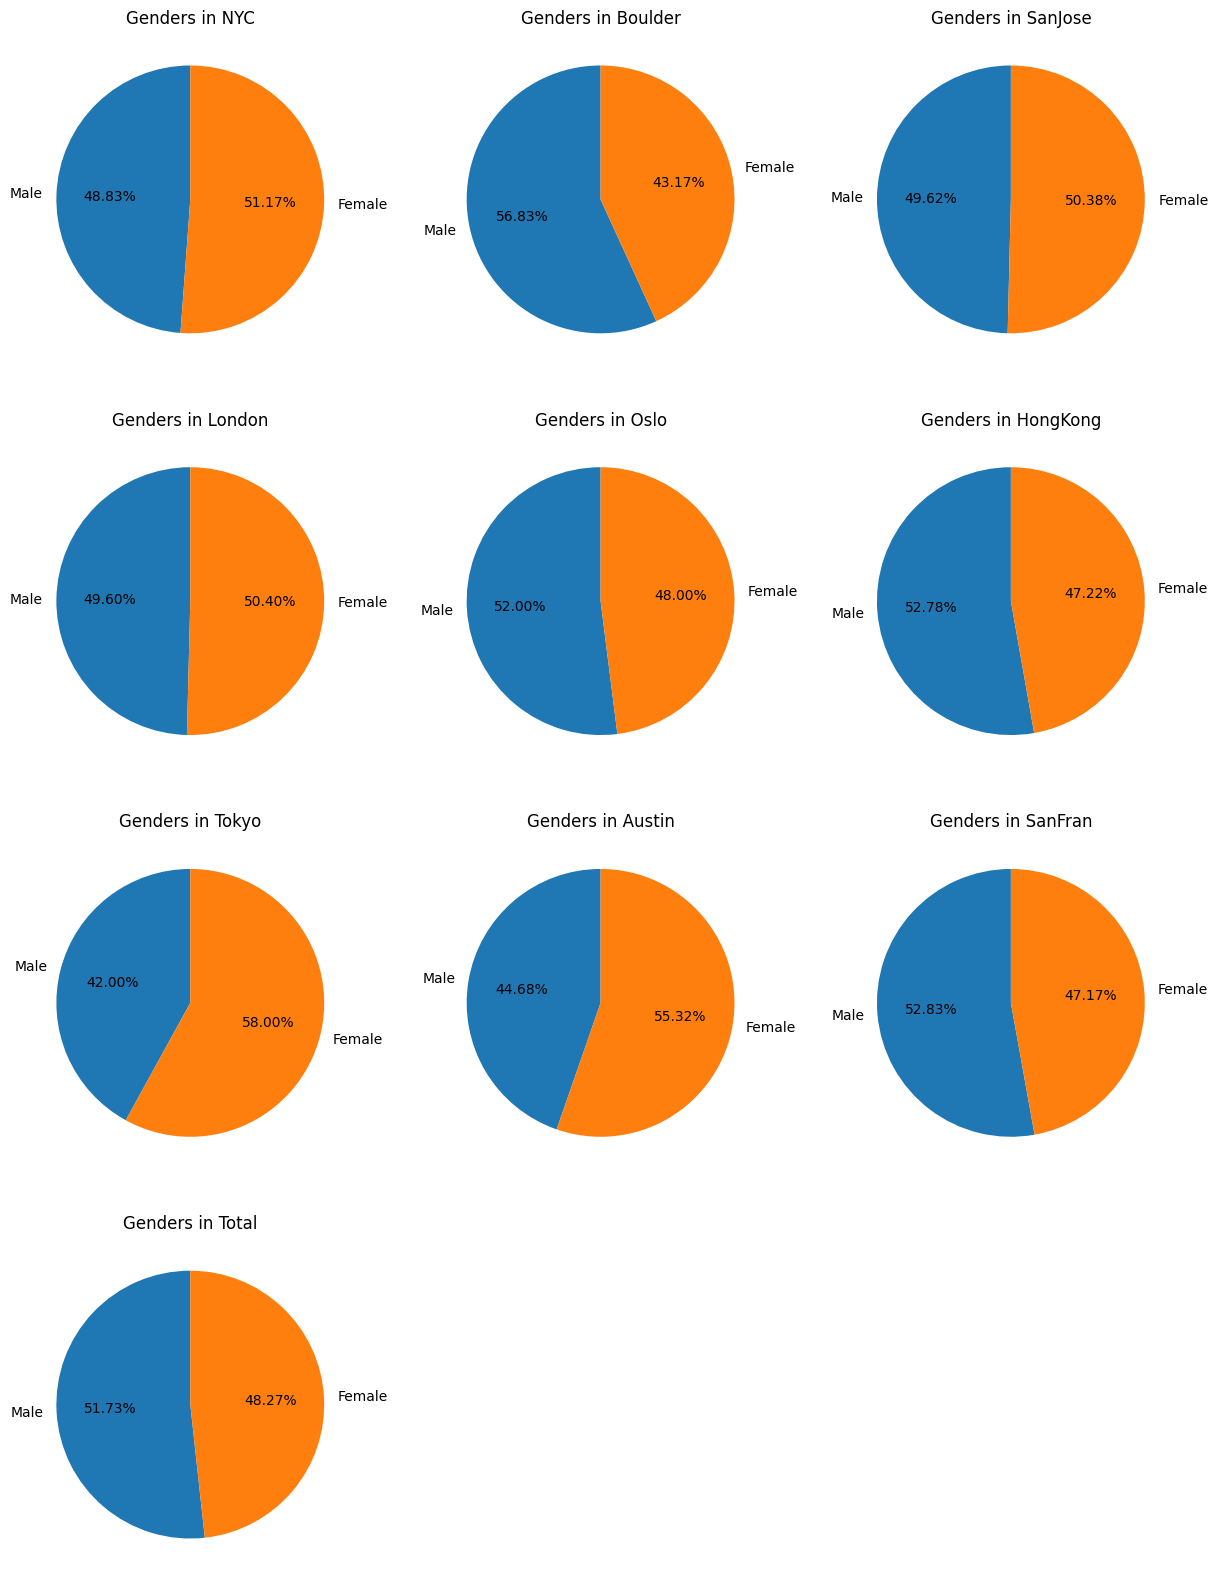

In [9]:
offices = df_final.select("Office").to_series().to_list()
num_plots = len(offices)

ncols = 3
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, office in enumerate(offices):
    df_office = df_final.filter(pl.col("Office") == office)
    male_count = df_office.select("male").item()
    female_count = df_office.select("female").item()
    
    axes[i].pie([male_count, female_count], labels=["Male", "Female"], autopct='%1.2f%%', startangle=90)
    axes[i].set_title(f"Genders in {office}", fontsize=12)

for i in range(num_plots, len(axes)):
    axes[i].axis('off')
    
plt.show()

In [10]:
df_des_agg_Edu = df_combined_C_D.group_by(['Office','Education']).agg(
    pl.count().alias("Employee_count")
).sort(['Employee_count','Office'], descending = True)

df_wide = df_des_agg_Edu.pivot(
    index="Office",            
    columns="Education",          
    values="Employee_count",   
    aggregate_function='first' 
)

df_total = df_wide.select(
    pl.sum("Undergraduate").alias("Undergraduate"),
    pl.sum("High School").alias("High School"),
    pl.sum("Graduate").alias("Graduate"),
    pl.sum("Some College").alias("Some College"),
    pl.sum("PhD").alias("PhD")
).with_columns(
    pl.lit("Total").alias("Office")
)

df_total = df_total.select(df_wide.columns)
df_final = df_wide.vstack(df_total)
df_final = df_final.fill_null(0)

display(df_final)

/tmp/ipykernel_13/745678657.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("Employee_count")
/tmp/ipykernel_13/745678657.py:5: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  df_wide = df_des_agg_Edu.pivot(


Office,Undergraduate,High School,Graduate,Some College,PhD
str,u32,u32,u32,u32,u32
"""NYC""",1202,310,123,118,43
"""Boulder""",1070,282,120,114,47
"""SanJose""",597,161,55,66,38
"""London""",154,55,27,12,2
"""Oslo""",100,23,12,12,3
"""HongKong""",56,10,3,2,1
"""SanFran""",44,4,3,0,2
"""Austin""",33,2,4,6,2
"""Tokyo""",32,10,5,2,1


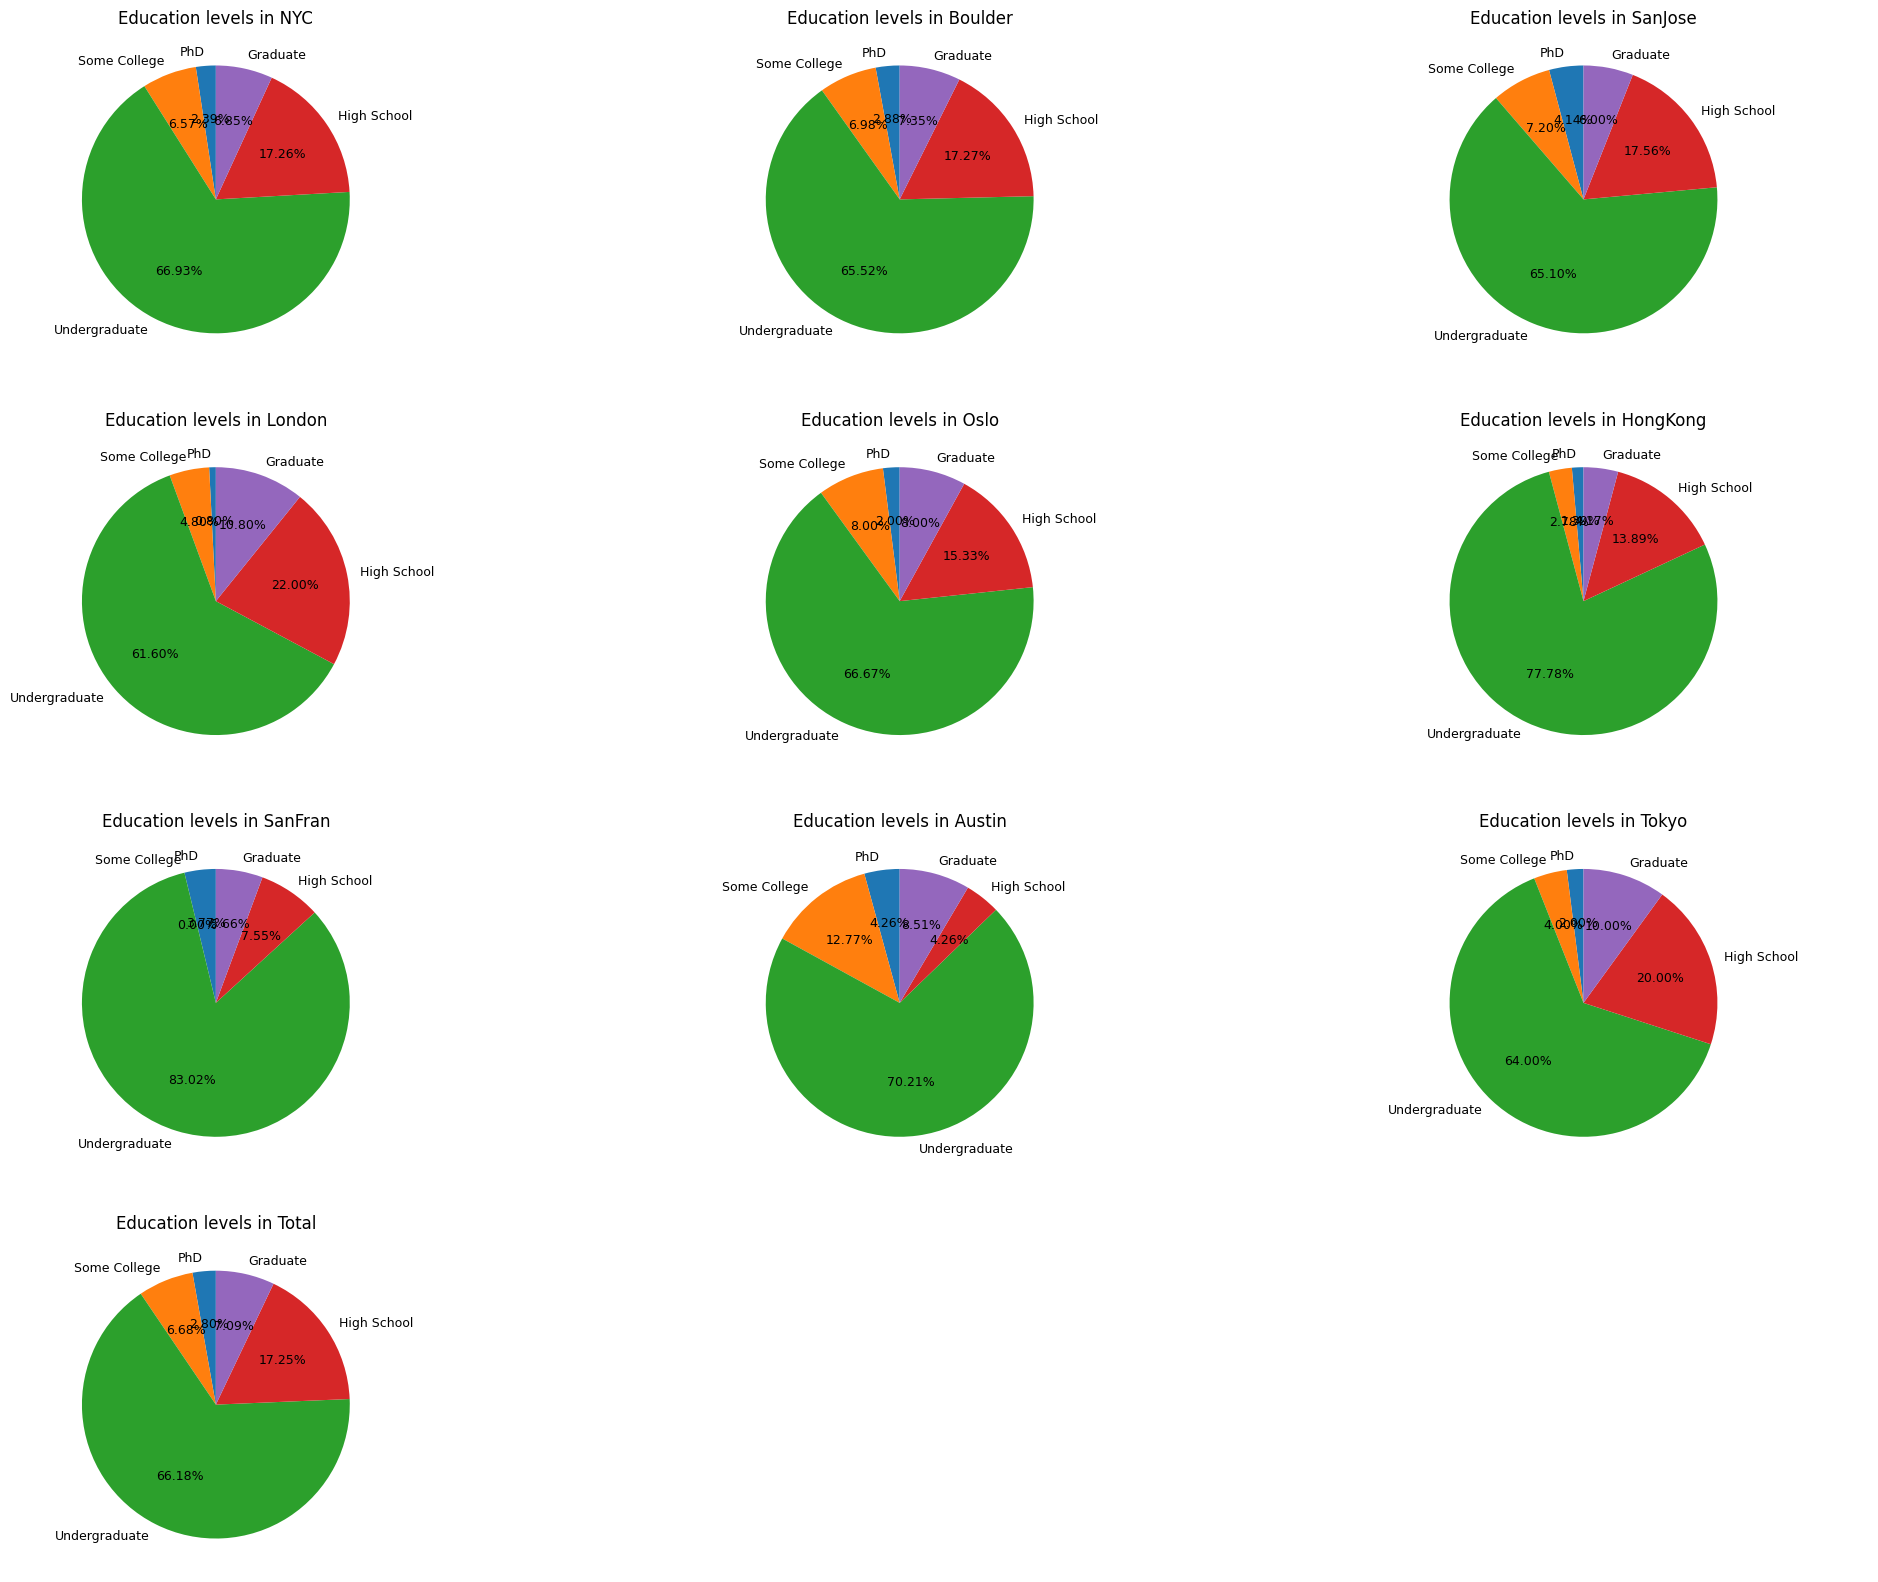

In [11]:
offices = df_final.select("Office").to_series().to_list()
num_plots = len(offices)

ncols = 3
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 5 * nrows))
axes = axes.flatten()

for i, office in enumerate(offices):
    df_office = df_final.filter(pl.col("Office") == office)
    PhD = df_office.select("PhD").item()
    Some_College = df_office.select("Some College").item()
    Undergraduate = df_office.select("Undergraduate").item()
    High_School = df_office.select("High School").item()
    Graduate = df_office.select("Graduate").item()
    
    
    axes[i].pie([PhD, Some_College,Undergraduate,High_School,Graduate], labels=["PhD", "Some College","Undergraduate","High School","Graduate"], autopct='%1.2f%%', startangle=90, textprops={'fontsize': 9})
    axes[i].set_title(f"Education levels in {office}", fontsize=12)

for i in range(num_plots, len(axes)):
    axes[i].axis('off')
    
plt.show()

Office,Avg_Normalized_Salary (USD),Employee_Count,COL Amount
str,f64,u32,f64
"""Boulder""",133703.525501,1633,70.0
"""Austin""",123404.255319,47,70.0
"""SanFran""",107452.830189,53,100.0
"""Oslo""",76565.028571,150,70.0
"""SanJose""",73287.28947,917,90.0
"""NYC""",67435.96882,1796,100.0
"""London""",47208.2,250,90.0
"""Tokyo""",46930.9536,50,85.0
"""HongKong""",45802.294118,72,85.0


shape: (9,)
Series: 'Office' [str]
[
	"Boulder"
	"Austin"
	"SanFran"
	"Oslo"
	"SanJose"
	"NYC"
	"London"
	"Tokyo"
	"HongKong"
]


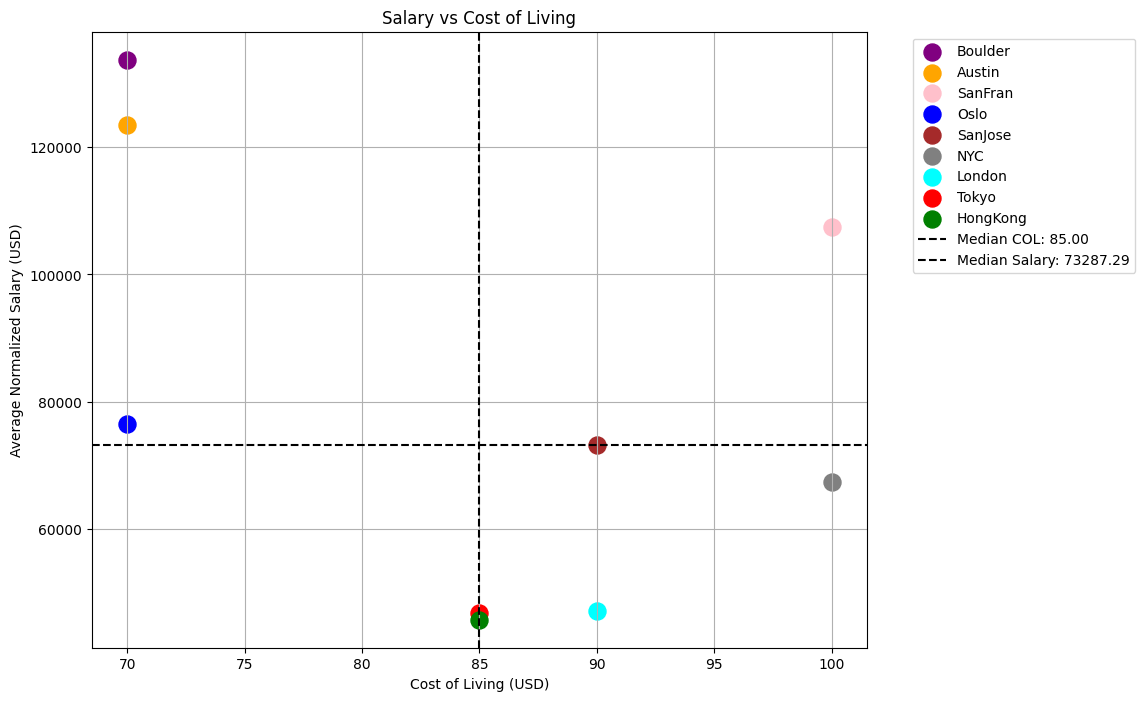

In [12]:
#Salary & COL Relationship
pl.Config.float_precision = None
df_group = df_combined_C_P.group_by("Office").agg(
    pl.col("Normalized_Salary (USD)").mean().alias("Avg_Normalized_Salary (USD)"),
    pl.col("EmployeeID").count().alias("Employee_Count"),
    pl.col("COL Amount").mean()
).sort("Avg_Normalized_Salary (USD)", descending=True)
display(df_group)

print(df_group['Office'])

color_map = {
    "Tokyo" : "red",
	"Oslo" : "blue",
	"HongKong" : "green",
	"Boulder" : "purple",
	"Austin" : "orange",
	"SanFran" : "pink",
	"SanJose" : "brown",
	"NYC" : "gray",
	"London" : "cyan"
}
custom_color = [color_map.get(office, 'black') for office in df_group['Office']]

fig,ax = plt.subplots(figsize = (10,8))
for office, color in zip(df_group['Office'], custom_color):
	office_data = df_group.filter(pl.col("Office") == office)
	plt.scatter(office_data['COL Amount'], office_data['Avg_Normalized_Salary (USD)'], label = office, color = color, s = 150)

median_COL = df_group['COL Amount'].median()
median_Salary = df_group['Avg_Normalized_Salary (USD)'].median()

plt.axvline(x=median_COL, color='black', linestyle='--', label=f'Median COL: {median_COL:.2f}')
plt.axhline(y=median_Salary, color='black', linestyle='--', label=f'Median Salary: {median_Salary:.2f}')

plt.title('Salary vs Cost of Living')
plt.xlabel('Cost of Living (USD)')
plt.ylabel('Average Normalized Salary (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()
plt.show()


In [13]:
df_group_maxsalary = df_combined_C_P.group_by("Office").agg(
    pl.col("Salary_USD").max().alias("Max_Salary_USD"),
    pl.col('COL Amount').mean().alias('Avg_COL_Amount'),
    pl.col('Normalized_Salary (USD)').max().round(2).alias('Max_Normalized_Salary (USD)'),
    pl.col('Normalized_Salary (USD)').mean().round(2).alias('AVE_Normalized_Salary (USD)')
).sort('Max_Normalized_Salary (USD)', 'AVE_Normalized_Salary (USD)', descending=True)
display(df_group_maxsalary)


Office,Max_Salary_USD,Avg_COL_Amount,Max_Normalized_Salary (USD),AVE_Normalized_Salary (USD)
str,f64,f64,f64,f64
"""Boulder""",400000.0,70.0,571428.57,133703.53
"""NYC""",500000.0,100.0,500000.0,67435.97
"""SanJose""",342000.0,90.0,380000.0,73287.29
"""SanFran""",355000.0,100.0,355000.0,107452.83
"""Austin""",227500.0,70.0,325000.0,123404.26
"""HongKong""",77682.0,85.0,91390.59,45802.29
"""Oslo""",54749.2,70.0,78213.14,76565.03
"""Tokyo""",64606.8,85.0,76008.0,46930.95
"""London""",59620.0,90.0,66244.44,47208.2


- The remarkable points are Boulder, Austin, and Oslo. They are in the low COL - high Salary zone, which should be consider carefully to make salary equal.

- The other should be consider, but less priority, is San Francisco. They are in the high COL - high Salary zone. we should consider carefully between SanFran and NYC as they are all in high COL zone.

2. Evaluate Employee Engagement and Retention

Office,Avg_Personal_Engagement,Avg_Recommend_TheCompany,Avg_Leadership_Cares,Avg_Manager_Support,Avg_Plan_to_Stay,Avg_Manager_Motivation,Avg_Personal_Motivation
str,f64,f64,f64,f64,f64,f64,f64
"""SanJose""",2.88,2.98,2.95,2.8,3.02,2.89,2.96
"""HongKong""",3.1,3.1,3.17,2.81,2.88,2.6,2.76
"""NYC""",2.98,2.89,2.89,2.94,2.9,2.93,2.94
"""Tokyo""",3.03,3.0,2.61,3.15,3.12,2.85,3.09
"""London""",2.94,3.01,2.98,3.02,2.83,2.9,2.93
"""SanFran""",2.78,2.92,2.86,2.82,2.9,2.88,2.64
"""Boulder""",2.9,2.89,2.94,2.91,2.89,2.98,2.91
"""Austin""",2.95,2.95,3.14,3.11,3.07,3.14,3.18
"""Oslo""",2.96,2.98,2.86,2.87,2.92,2.79,3.1


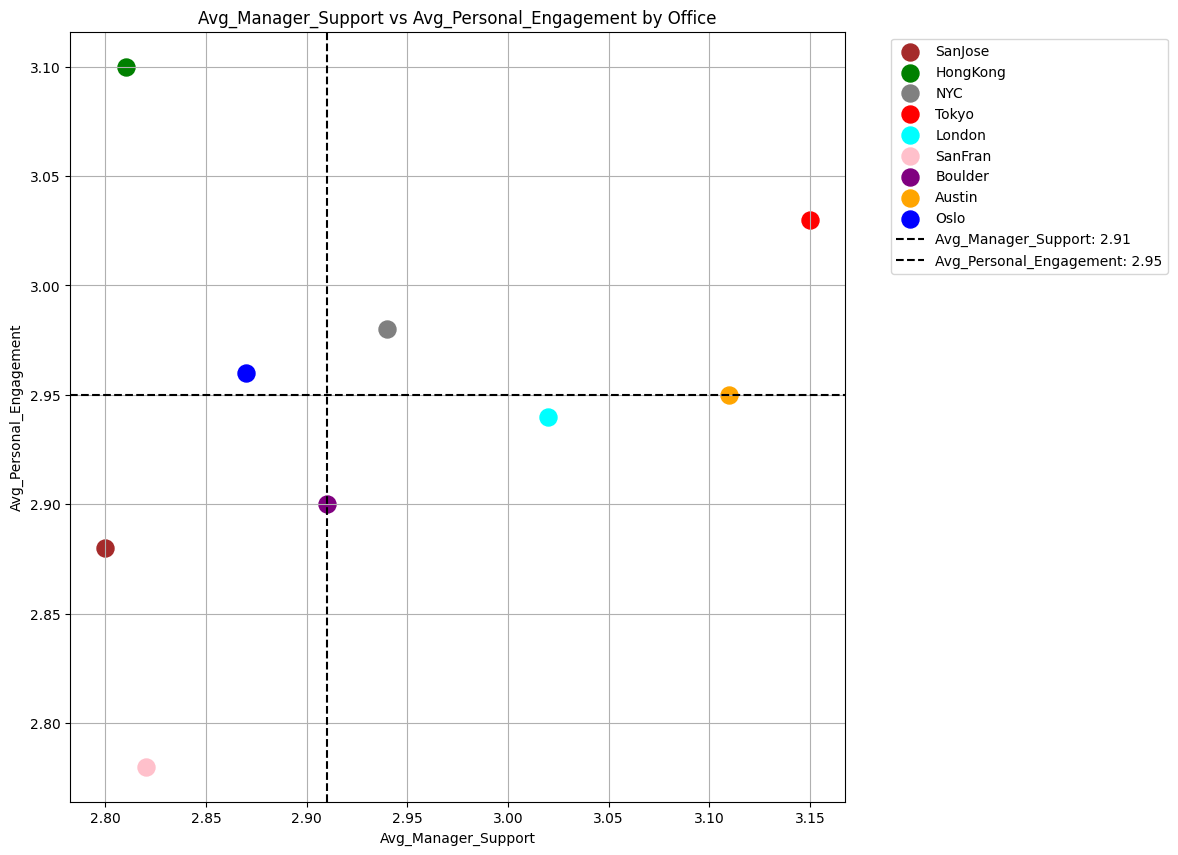

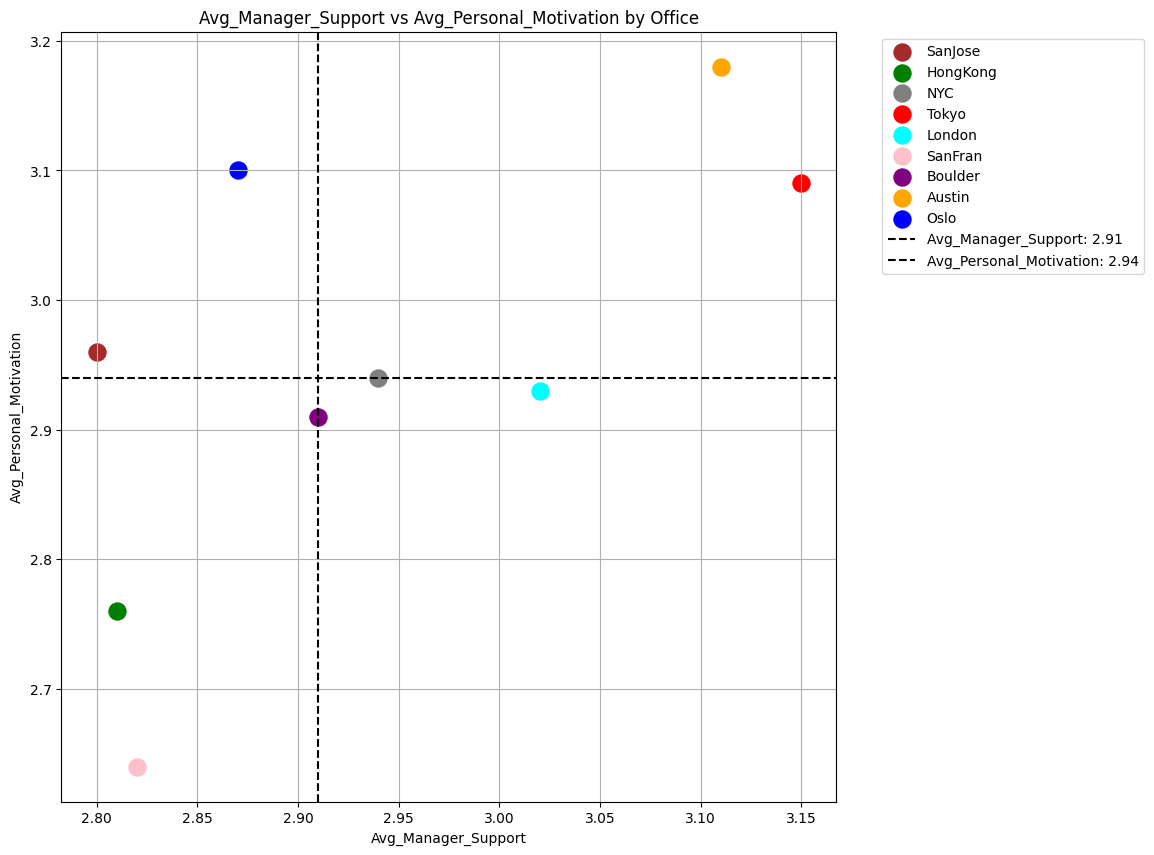

In [14]:
df_group = Company.join(Engagement, on = "EmployeeID", how = "inner")

df_agg = df_group.group_by("Office").agg(
    pl.col("I feel engaged in my work.").mean().round(2).alias("Avg_Personal_Engagement"),
    pl.col("I would recommend my friends or Family to work at TheCompany").mean().round(2).alias("Avg_Recommend_TheCompany"),
    pl.col("I believe Leadership cares about the employees at TheCompany").mean().round(2).alias("Avg_Leadership_Cares"),
    pl.col("My manager supports me in my role at TheCompany").mean().round(2).alias("Avg_Manager_Support"),
    pl.col("I plan on staying with TheCompany for at least 2 more years.").mean().round(2).alias("Avg_Plan_to_Stay"),
    pl.col("My manager motivates me to work hard.").mean().round(2).alias("Avg_Manager_Motivation"),
    pl.col("I am motivated to work hard at TheCompany.").mean().round(2).alias("Avg_Personal_Motivation")
)
display(df_agg)

color_map = {
    "Tokyo" : "red",
	"Oslo" : "blue",
	"HongKong" : "green",
	"Boulder" : "purple",
	"Austin" : "orange",
	"SanFran" : "pink",
	"SanJose" : "brown",
	"NYC" : "gray",
	"London" : "cyan"
}
custom_color = [color_map.get(office, 'black') for office in df_agg['Office']]
def plot_scatter(df, col1, col2, collabel, color_map):
    custom_color = [color_map.get(ele1, 'black') for ele1 in df[collabel]]
    fig, ax = plt.subplots(figsize = (10,10))
    for label, color in zip(df[collabel],custom_color):
        label_data = df.filter(pl.col(collabel) == label)
        plt.scatter(label_data[col1],label_data[col2], label = label, c = color, s=150)
    
    median_col1 = df[col1].median()
    median_col2 = df[col2].median()

    plt.axvline(x=median_col1, color='black', linestyle='--', label=f'{col1}: {median_col1:.2f}')
    plt.axhline(y=median_col2, color='black', linestyle='--', label=f'{col2}: {median_col2:.2f}')

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2} by {collabel}')
    plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left')
    plt.grid()
    plt.show()

plot_scatter(df_agg, 'Avg_Manager_Support', 'Avg_Personal_Engagement', 'Office', color_map)
plot_scatter(df_agg, 'Avg_Manager_Support', 'Avg_Personal_Motivation', 'Office', color_map)


Avg_Personal_Engagement
- Ausin, London, Boulder are under high support but low engagement.
- SanJose and SanFran should be considered as they are in Low Support - Low Engagement.
- HongKong and Oslo also are in good environment state.

Avg_Personal_Motivation:
- HongKong and SanFran are in Low Support - Low Motivation.
- SanJose and Oslo are in high motivation, despite the low support from manager.


In [15]:
df_define = df_agg.with_columns(
    pl.when(pl.col('Avg_Manager_Support') <= 2.91)
        .then(pl.lit('Low'))
        .otherwise(pl.lit('High'))
        .alias('Manager_Support_Classification'),
    pl.when(pl.col('Avg_Personal_Engagement') <= 2.95)
        .then(pl.lit('Low'))
        .otherwise(pl.lit('High'))
        .alias('Personal_Engagement_Classification'),
    pl.when(pl.col('Avg_Personal_Motivation') <= 2.94)
        .then(pl.lit('Low'))
        .otherwise(pl.lit('High'))
        .alias('Personal_Motivation_Classification')
).sort("Manager_Support_Classification", descending = True)

df_define = df_define.with_columns(
    pl.when(
        (pl.col('Manager_Support_Classification') == 'Low') & (pl.col('Personal_Engagement_Classification') == 'Low')
    ).then(pl.lit(3))
    .when(
        (pl.col('Manager_Support_Classification') == 'High') & (pl.col('Personal_Engagement_Classification') == 'Low')
    ).then(pl.lit(2))
    .when(
        (pl.col('Manager_Support_Classification') == 'High') & (pl.col('Personal_Engagement_Classification') == 'High')
    ).then(pl.lit(1))
    .when(
        (pl.col('Manager_Support_Classification') == 'Low') & (pl.col('Personal_Engagement_Classification') == 'High')
    ).then(pl.lit(0))
    .alias("Risk_Flag_Engagement"),
    pl.when(
        (pl.col('Manager_Support_Classification') == 'Low') & (pl.col('Personal_Motivation_Classification') == 'Low')
    ).then(pl.lit(3))
    .when(
        (pl.col('Manager_Support_Classification') == 'High') & (pl.col('Personal_Motivation_Classification') == 'Low')
    ).then(pl.lit(2))
    .when(
        (pl.col('Manager_Support_Classification') == 'High') & (pl.col('Personal_Motivation_Classification') == 'High')
    ).then(pl.lit(1))
    .when(
        (pl.col('Manager_Support_Classification') == 'Low') & (pl.col('Personal_Motivation_Classification') == 'High')
    ).then(pl.lit(0))
    .alias("Risk_Flag_Motivation")
).sort(["Risk_Flag_Engagement", "Risk_Flag_Motivation"], descending = True)

display(df_define[["Office","Manager_Support_Classification", "Personal_Engagement_Classification", "Personal_Motivation_Classification","Risk_Flag_Engagement","Risk_Flag_Motivation"]])
# 0 to 3, the level is rising from no risk to highest risk.

Office,Manager_Support_Classification,Personal_Engagement_Classification,Personal_Motivation_Classification,Risk_Flag_Engagement,Risk_Flag_Motivation
str,str,str,str,i32,i32
"""SanFran""","""Low""","""Low""","""Low""",3,3
"""Boulder""","""Low""","""Low""","""Low""",3,3
"""SanJose""","""Low""","""Low""","""High""",3,0
"""London""","""High""","""Low""","""Low""",2,2
"""Austin""","""High""","""Low""","""High""",2,1
"""NYC""","""High""","""High""","""Low""",1,2
"""Tokyo""","""High""","""High""","""High""",1,1
"""HongKong""","""Low""","""High""","""Low""",0,3
"""Oslo""","""Low""","""High""","""High""",0,0


According to this, Oslo is 
- Boulder,SanFran : These are the high risk zone, they should be focus as not much manager support here. Espcially Boulder, the highest salary place.
- SanJose, HongKong: Here are the dangerous zone.
- London : Manager has supported hard but there are risks here.
- Austin, "NYC", "Tokyo": they all are in safe zone, but the salary in Austin is much higher than the others.
- Oslo: a good place, however, the salary is slightly high.